In [ ]:
#to see what's actually in the file:
import sys
sys.path.append('../src')

# Debug: See what's actually in the feature_engineer file
import inspect

# Check the actual contents of the file
with open('../src/feature_engineer.py', 'r') as f:
    content = f.read()
    print("FILE CONTENTS (first 500 chars):")
    print(content[:500])
    print("\n" + "="*50)

# Try to import the module and see what's available
import feature_engineer

print("AVAILABLE ITEMS IN MODULE:")
for item in dir(feature_engineer):
    if not item.startswith('_'):
        print(f"  - {item}")

print("\n" + "="*50)


FILE CONTENTS (first 500 chars):
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

class MentalHealthFeatureEngineer:
    """
    Feature engineering pipeline for mental health risk prediction
    Incorporates biostatistical principles
    """


AVAILABLE ITEMS IN MODULE:
  - ColumnTransformer
  - LabelEncoder
  - MentalHealthFeatureEngineer
  - Pipeline
  - SelectKBest
  - SimpleImputer
  - StandardScaler
  - analyze_feature_importance
  - f_classif
  - np
  - pd
  - warnings



In [3]:
# Set up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif
import sys
import os

# Add src to path
sys.path.append('../src')
# Import our feature engineering tools
from feature_engineer import MentalHealthFeatureEngineer, analyze_feature_importance

print("✅ Import successful! Ready to proceed.")

✅ Import successful! Ready to proceed.


In [4]:
# Load data
data = pd.read_csv('../data/raw/synthetic_mh_data.csv')
print("Original data shape:", data.shape)
print("Columns:", list(data.columns))
print("\nFirst 3 rows:")
print(data.head(3))


Original data shape: (1500, 14)
Columns: ['age', 'gender', 'phq9_score', 'gad7_score', 'bp_systolic', 'heart_rate', 'bmi', 'education', 'employment', 'high_risk', 'time_to_event', 'event_occurred', 'data_source', 'generation_date']

First 3 rows:
   age  gender  phq9_score  gad7_score  bp_systolic  heart_rate        bmi  \
0   52    Male          13          10   145.195417   48.053119  22.928811   
1   42  Female          11           4   137.412279   82.637092  36.525995   
2   54  Female           8           8   119.215409   43.603378  35.459375   

  education employment  high_risk  time_to_event  event_occurred  \
0   College   Disabled          1      56.263794               0   
1  Graduate   Disabled          1     665.043631               0   
2  Graduate   Employed          0    1181.680714               0   

            data_source generation_date  
0  i-Lit_Synthetic_v1.0      2025-11-25  
1  i-Lit_Synthetic_v1.0      2025-11-25  
2  i-Lit_Synthetic_v1.0      2025-11-25  

In [5]:
# Initialize feature engineer
engineer = MentalHealthFeatureEngineer()

# Run complete feature engineering
X_processed, y, feature_names, df_engineered = engineer.fit_transform(data)

print("\nEngineered Dataset Info:")
print(f"Processed features shape: {X_processed.shape}")
print(f"Target distribution: {y.value_counts().to_dict()}")

# Save engineered data
df_engineered.to_csv('../data/processed/engineered_mh_data.csv', index=False)
print("\n✓ Engineered data saved")

# Feature Importance Analysis
print("\n" + "="*50)
print("STATISTICAL FEATURE ANALYSIS")
print("="*50)

importance_df = analyze_feature_importance(X_processed, y, feature_names)
print("\nTop 10 Most Important Features (ANOVA F-test):")
print(importance_df.head(10))


Starting feature engineering...
✓ Clinical features created
✓ Statistical features created
Numeric features: ['age', 'phq9_score', 'gad7_score', 'bp_systolic', 'heart_rate', 'bmi', 'composite_mh_score', 'high_phq_high_bp', 'social_risk_score', 'phq9_zscore', 'age_squared', 'phq9_squared', 'age_phq_interaction', 'bmi_hr_interaction']
Categorical features: ['gender', 'education', 'employment', 'data_source', 'generation_date', 'phq9_category', 'gad7_category', 'bmi_category', 'age_group', 'bp_category']
✓ Preprocessing completed
✓ Final shape: (1500, 48)
✓ Total features: 48

Engineered Dataset Info:
Processed features shape: (1500, 48)
Target distribution: {0: 1054, 1: 446}

✓ Engineered data saved

STATISTICAL FEATURE ANALYSIS

Top 10 Most Important Features (ANOVA F-test):
                   feature     f_score       p_value
12     age_phq_interaction  442.065932  3.296845e-86
10             age_squared  242.034285  1.050099e-50
0                      age  228.548803  3.653569e-48
6  

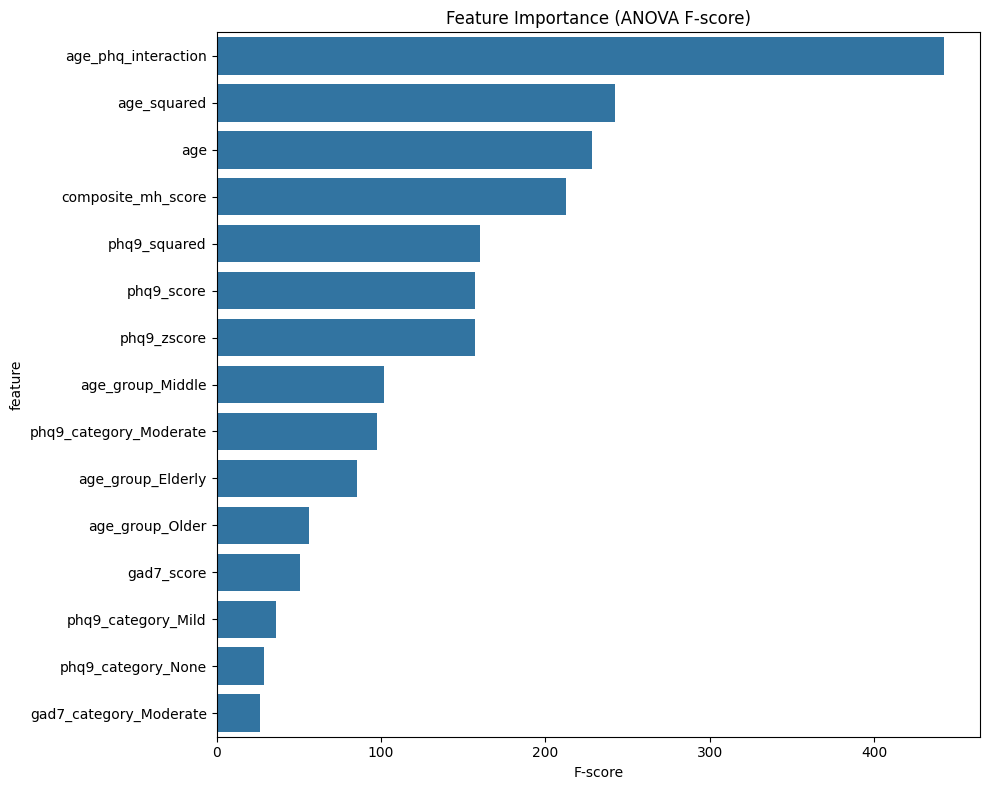

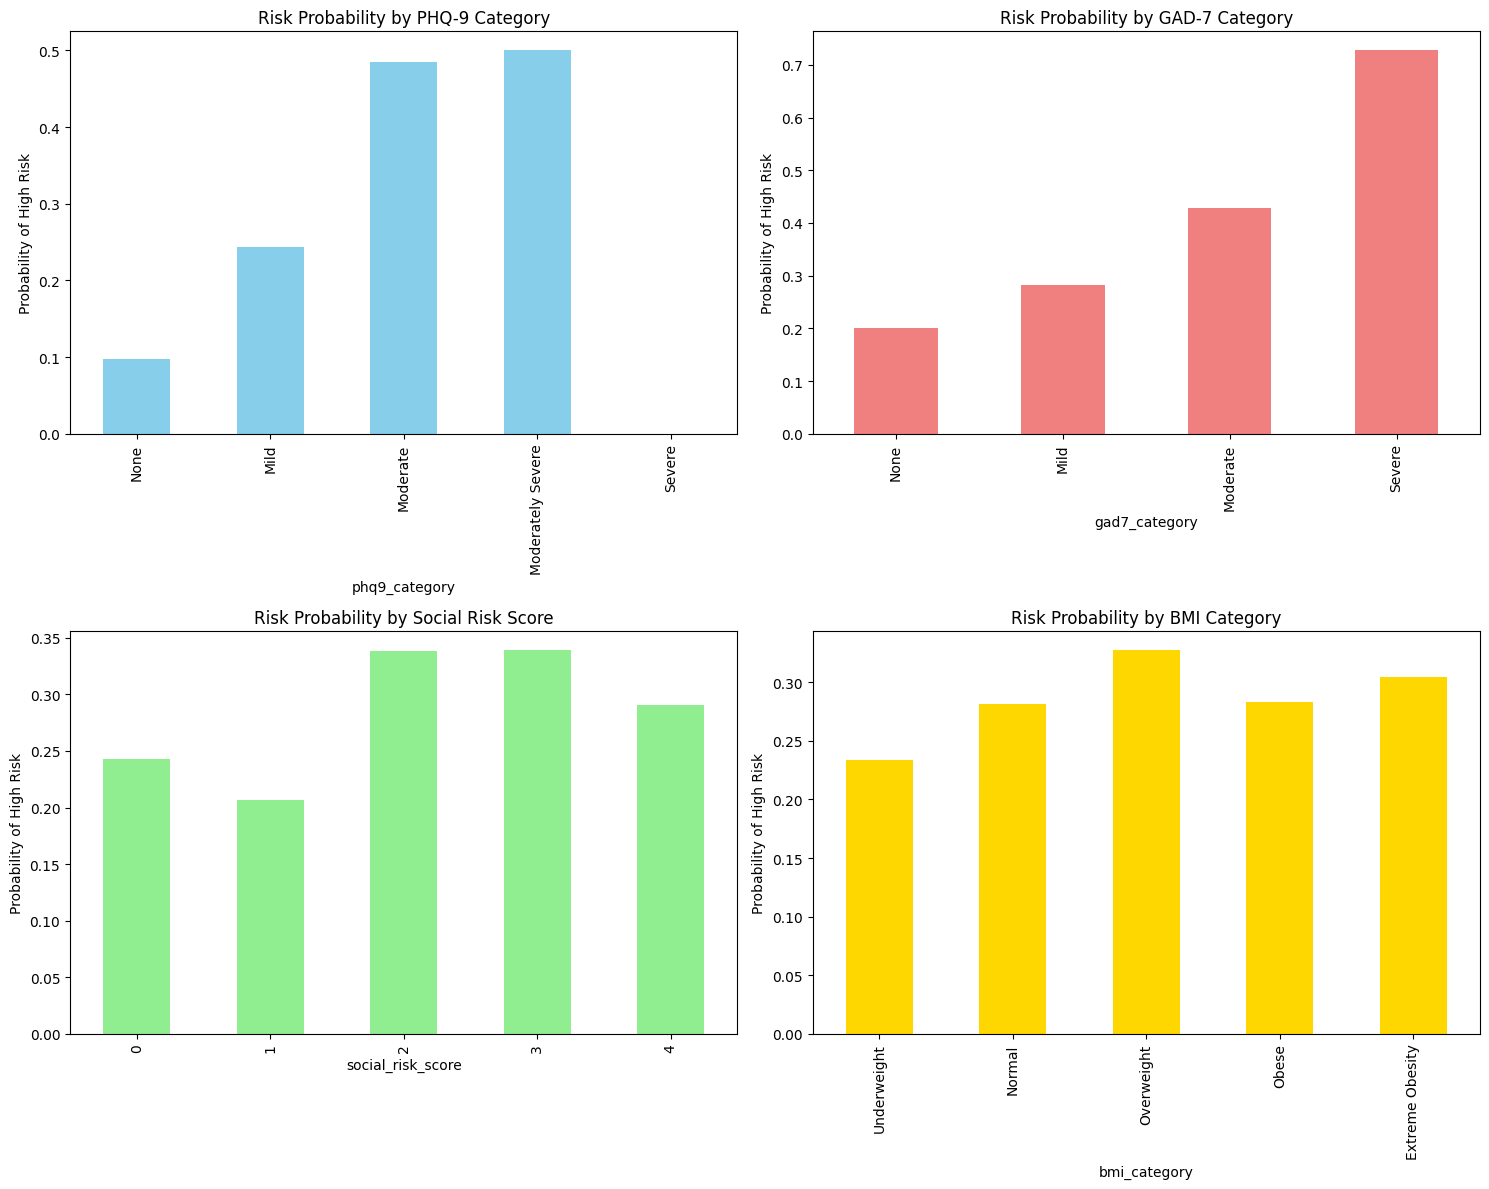

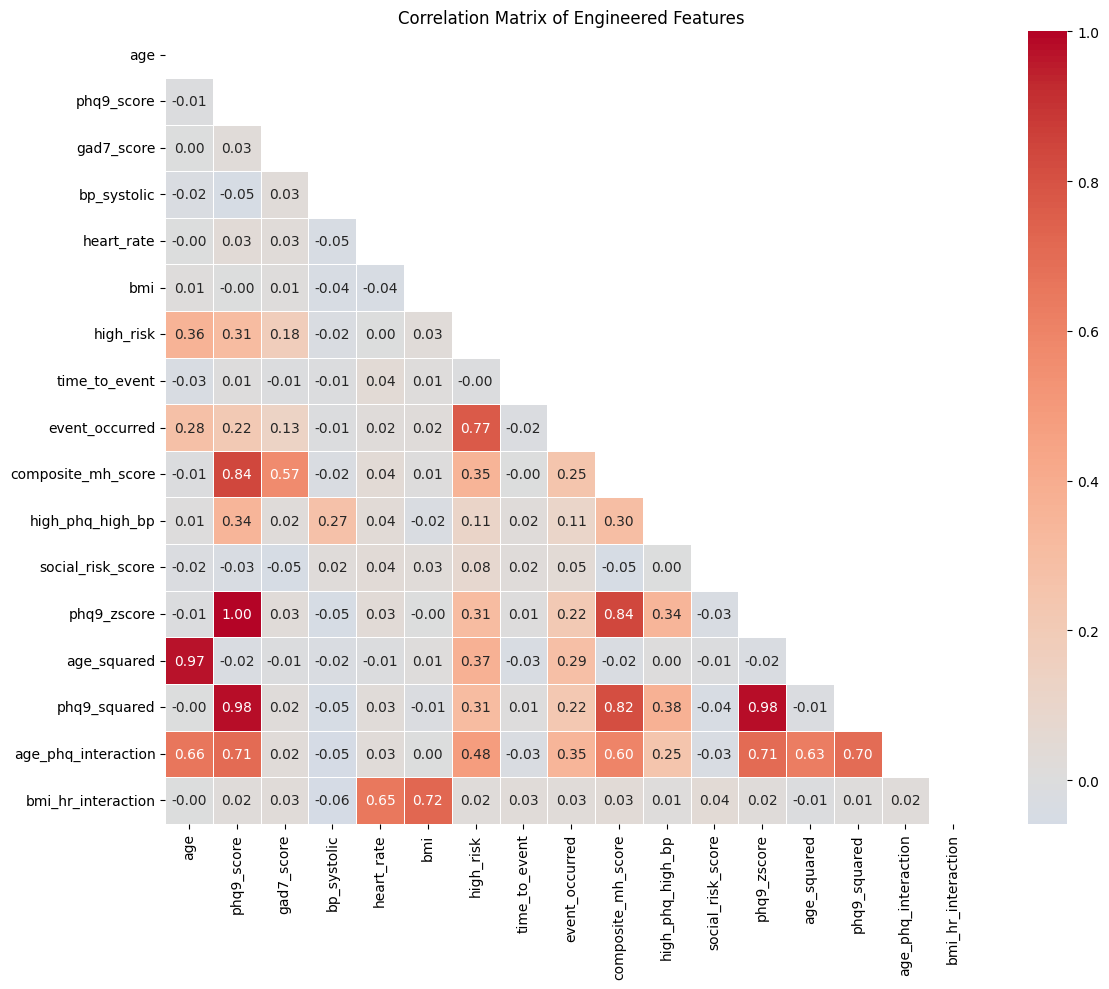


CLINICAL INSIGHTS SUMMARY

1. Risk by PHQ-9 Categories:
   Moderate: 48.5% risk (400 patients)
   Mild: 24.4% risk (954 patients)
   None: 9.7% risk (134 patients)
   Moderately Severe: 50.0% risk (12 patients)

2. Risk by Social Determinants:
   Employment:
     Disabled: 32.6%
     Employed: 23.1%
     Unemployed: 33.5%

3. Composite Score Analysis:
   Average composite score for high-risk: 8.69
   Average composite score for low-risk: 7.17

✓ Feature importance analysis saved


In [6]:
# Visualization 1: Feature Importance
plt.figure(figsize=(10, 8))
top_features = importance_df.head(15)
sns.barplot(data=top_features, y='feature', x='f_score')
plt.title('Feature Importance (ANOVA F-score)')
plt.xlabel('F-score')
plt.tight_layout()
plt.show()

# Visualization 2: Clinical Category Distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# PHQ-9 categories by risk
risk_by_phq = df_engineered.groupby('phq9_category')['high_risk'].mean()
risk_by_phq.plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Risk Probability by PHQ-9 Category')
axes[0,0].set_ylabel('Probability of High Risk')

# GAD-7 categories by risk
risk_by_gad = df_engineered.groupby('gad7_category')['high_risk'].mean()
risk_by_gad.plot(kind='bar', ax=axes[0,1], color='lightcoral')
axes[0,1].set_title('Risk Probability by GAD-7 Category')
axes[0,1].set_ylabel('Probability of High Risk')

# Social risk score
risk_by_social = df_engineered.groupby('social_risk_score')['high_risk'].mean()
risk_by_social.plot(kind='bar', ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('Risk Probability by Social Risk Score')
axes[1,0].set_ylabel('Probability of High Risk')

# BMI categories
risk_by_bmi = df_engineered.groupby('bmi_category')['high_risk'].mean()
risk_by_bmi.plot(kind='bar', ax=axes[1,1], color='gold')
axes[1,1].set_title('Risk Probability by BMI Category')
axes[1,1].set_ylabel('Probability of High Risk')

plt.tight_layout()
plt.show()

# Visualization 3: Correlation Matrix of Engineered Features
plt.figure(figsize=(12, 10))
numeric_engineered = df_engineered.select_dtypes(include=[np.number])
correlation_matrix = numeric_engineered.corr()

# Mask for upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
            center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Engineered Features')
plt.tight_layout()
plt.show()

# Statistical Summary
print("\n" + "="*50)
print("CLINICAL INSIGHTS SUMMARY")
print("="*50)

# Risk by clinical categories
print("\n1. Risk by PHQ-9 Categories:")
for category in df_engineered['phq9_category'].unique():
    subset = df_engineered[df_engineered['phq9_category'] == category]
    risk_rate = subset['high_risk'].mean()
    count = len(subset)
    print(f"   {category}: {risk_rate:.1%} risk ({count} patients)")

print("\n2. Risk by Social Determinants:")
print("   Employment:")
for employment in df_engineered['employment'].unique():
    subset = df_engineered[df_engineered['employment'] == employment]
    risk_rate = subset['high_risk'].mean()
    print(f"     {employment}: {risk_rate:.1%}")

print("\n3. Composite Score Analysis:")
print(f"   Average composite score for high-risk: {df_engineered[df_engineered['high_risk']==1]['composite_mh_score'].mean():.2f}")
print(f"   Average composite score for low-risk: {df_engineered[df_engineered['high_risk']==0]['composite_mh_score'].mean():.2f}")

# Save feature importance results
importance_df.to_csv('../data/processed/feature_importance.csv', index=False)
print("\n✓ Feature importance analysis saved")